Last update 19.12.2019

Author : Jeanne Colbois

Please send any comments, questions or remarks to Jeanne Colbois: jeanne.colbois@epfl.ch.
The author would appreciate to be cited in uses of this code, and would be very happy to hear about potential nice developments.

In [1]:
%load_ext line_profiler

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug
    # gather results obtained from the runs  
    # system commands
import os

import KagomeFunctions_OBC as kf # "library"< allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import KagomeFT as kft
import AnalysisFunctions_OBC as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
import StartStates as strst
#import matplotlib.image as mpimg
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14})

In [3]:
# Create a folder to save the pictures
#foldername = 'Tests_SpinConfigs/'
#results_foldername = 'Results_Tests_SpinConfigs'
#os.makedirs('./' + foldername + 'Plots' + results_foldername, exist_ok = True)

In [4]:
#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/',]*2
#secondfilename = ['54-1_Demag2_5-BR_spin_config.txt','54-1_Demag2_5-TL_spin_config.txt']

#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*3
#secondfilename = ['54-1_Demag3_5-BL_spin_config.txt',
#                  '54-1_Demag3_5-BR_spin_config.txt',
#                  '54-1_Demag3_5-TL_spin_config.txt']

#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*2
#secondfilename = ['54-1_Demag4_5-BL_spin_config.txt',
#                  '54-1_Demag4_5-TL_spin_config.txt']

#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*3
#secondfilename = ['54-1_Demag5_5-BL_spin_config.txt',
#                  '54-1_Demag5_5-BR_spin_config.txt',
#                  '54-1_Demag5_5-TL_spin_config.txt']
#
#secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']*3
#secondfilename = ['54-1_Demag6_5-BL_spin_config.txt',
#                  '54-1_Demag6_5-BR_spin_config.txt',
#                  '54-1_Demag6_5-TL_spin_config.txt']
#
secondfoldername = ['../Analysis_PSI/Kagome_54-1_Demag_all/']#*20
secondfilename = ['54-1_Demag7_1-BL_spin_config.txt']
secondfilename = ['54-1_Demag7_1-BR_spin_config.txt']
secondfilename = ['54-1_Demag7_1-TL_spin_config.txt']
secondfilename = ['54-1_Demag7_1-TR_spin_config.txt']
#secondfilename = ['54-1_Demag7_1-BL_spin_config.txt',
#                  '54-1_Demag7_1-BR_spin_config.txt',
#                  '54-1_Demag7_1-TL_spin_config.txt',
#                  '54-1_Demag7_1-TR_spin_config.txt',
#                  '54-1_Demag7_2-BL_spin_config.txt',
#                  '54-1_Demag7_2-BR_spin_config.txt',
#                  '54-1_Demag7_2-TL_spin_config.txt',
#                  '54-1_Demag7_2-TR_spin_config.txt',
#                  '54-1_Demag7_3-BL_spin_config.txt',
#                  '54-1_Demag7_3-BR_spin_config.txt',
#                  '54-1_Demag7_3-TL_spin_config.txt',
#                  '54-1_Demag7_3-TR_spin_config.txt',
#                  '54-1_Demag7_4-BL_spin_config.txt',
#                  '54-1_Demag7_4-BR_spin_config.txt',
#                  '54-1_Demag7_4-TL_spin_config.txt',
#                  '54-1_Demag7_4-TR_spin_config.txt',
#                  '54-1_Demag7_5-BL_spin_config.txt',
#                  '54-1_Demag7_5-BR_spin_config.txt',
#                  '54-1_Demag7_5-TL_spin_config.txt',
#                  '54-1_Demag7_5-TR_spin_config.txt']

In [5]:
L = 16
domap = True
compute = True
LParam = (L-1, L-1, 0)

------------------- File number  0  ----------------------
--- Positions ---
Index  1049  :  [27.91907187  5.66383701]
Index  1051  :  [27.03452179  6.15959253]
Index  1048  :  [26.16808149  5.6590266 ]
Index  1157  :  [27.68251273 41.5466893 ]
Difference 3 0 :  [-0.23655914 35.88285229]
[[27.91907187  5.66383701]
 [27.03452179  6.15959253]
 [26.16808149  5.6590266 ]
 [27.68251273 41.5466893 ]]
Help for factor: currently 29.999999999999996 and 35.88363204634625


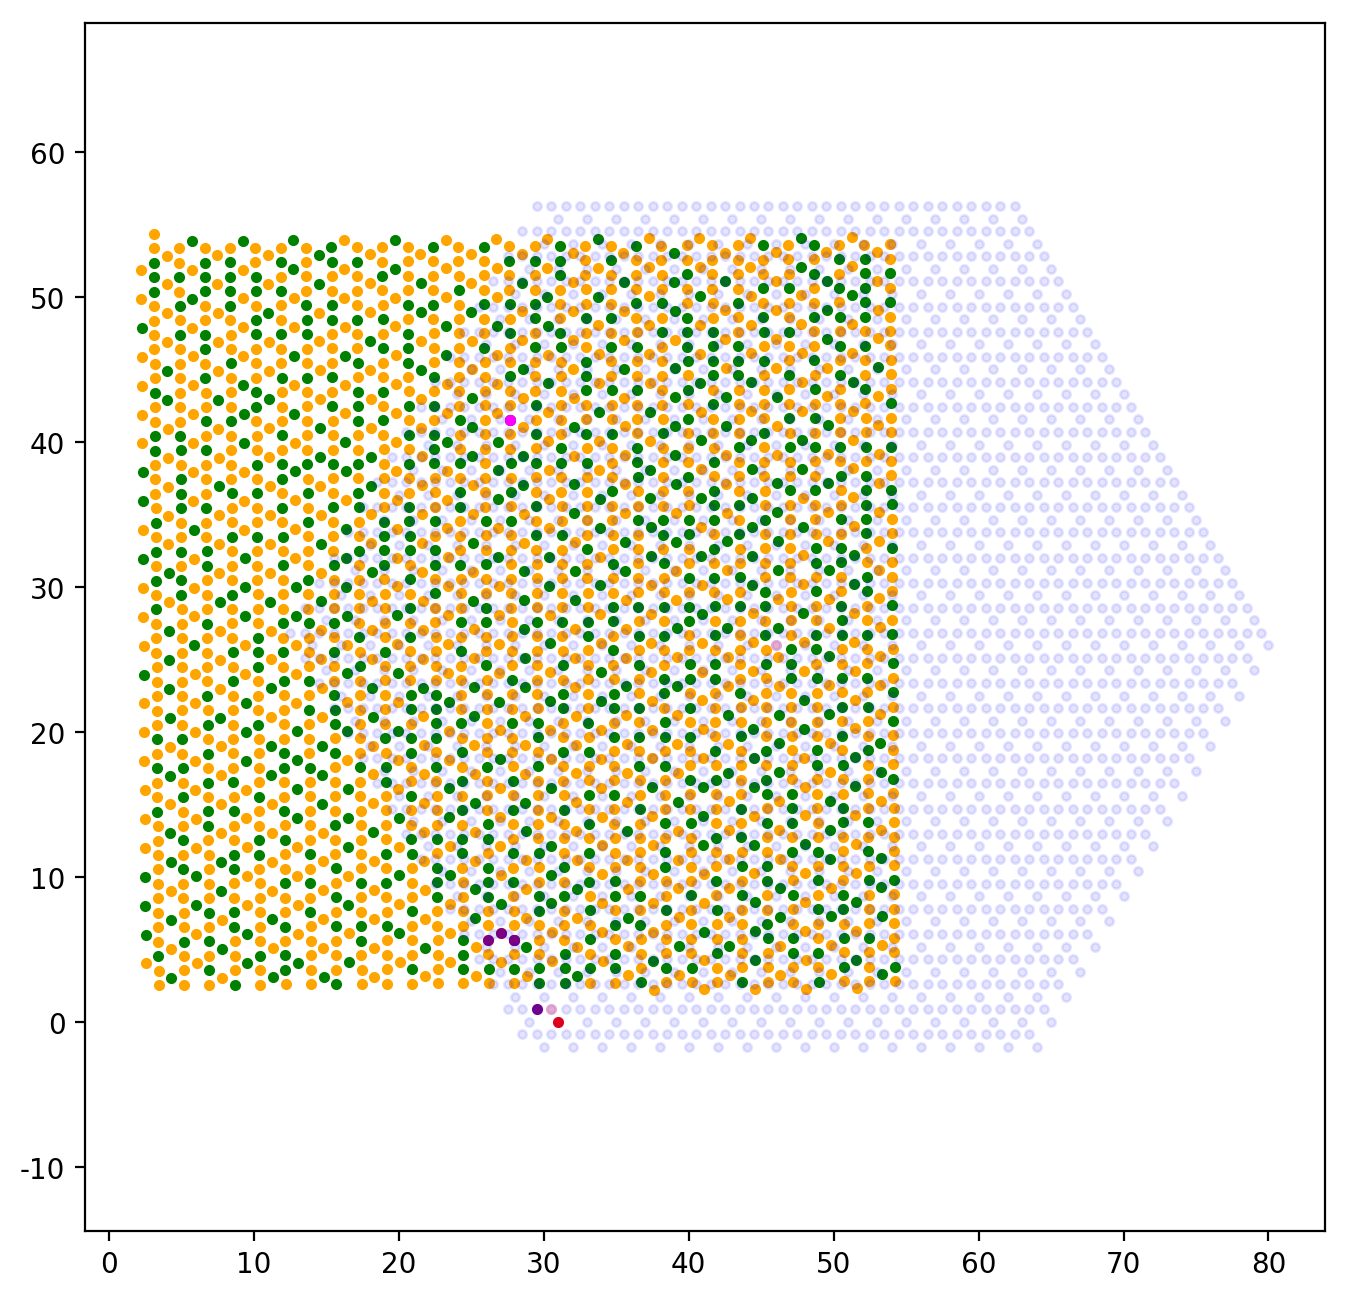

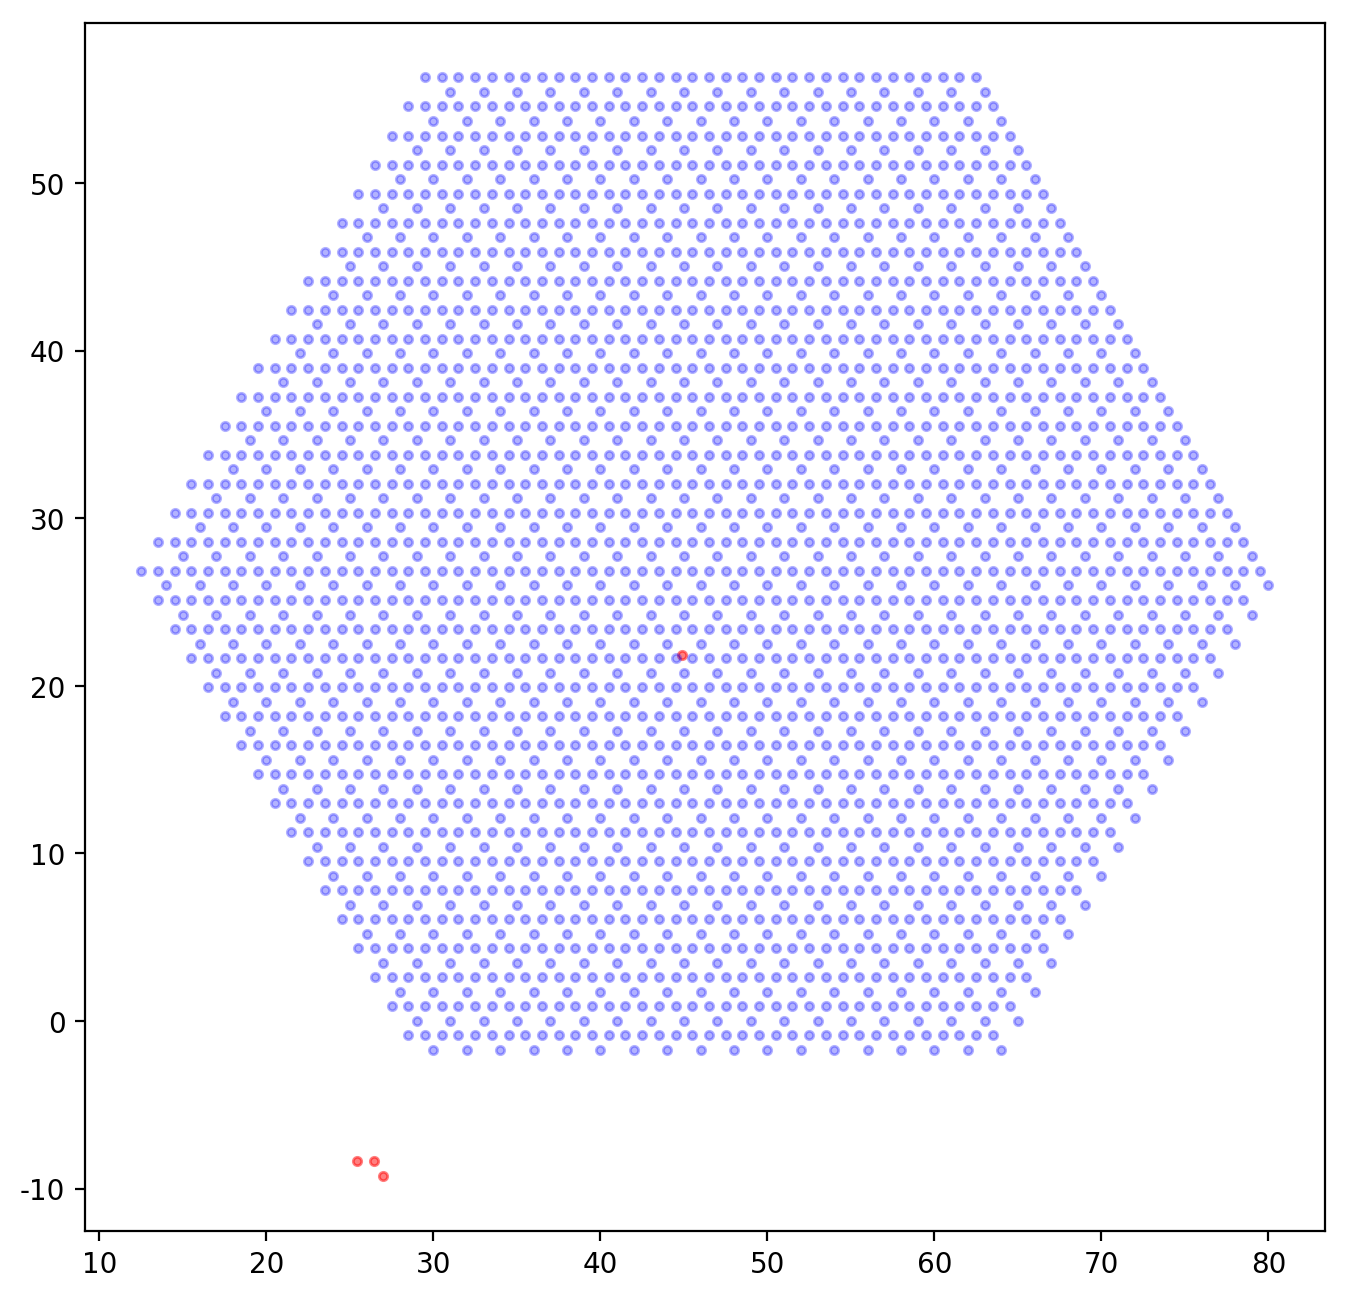

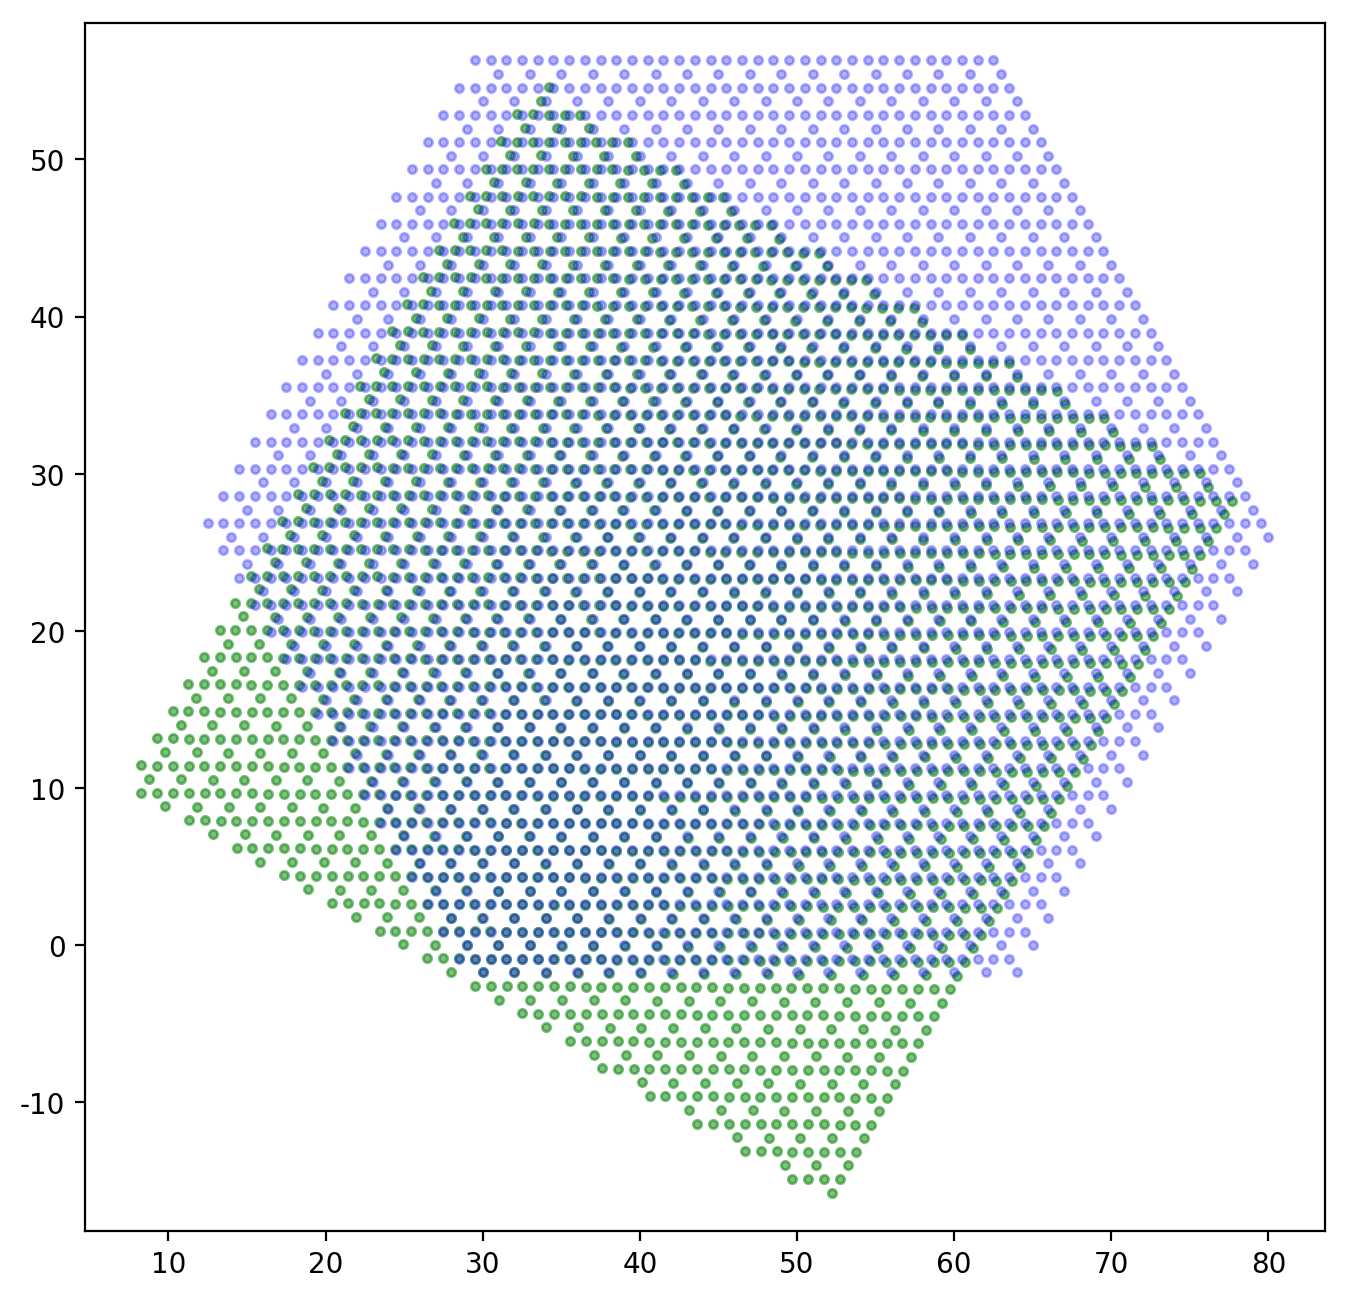

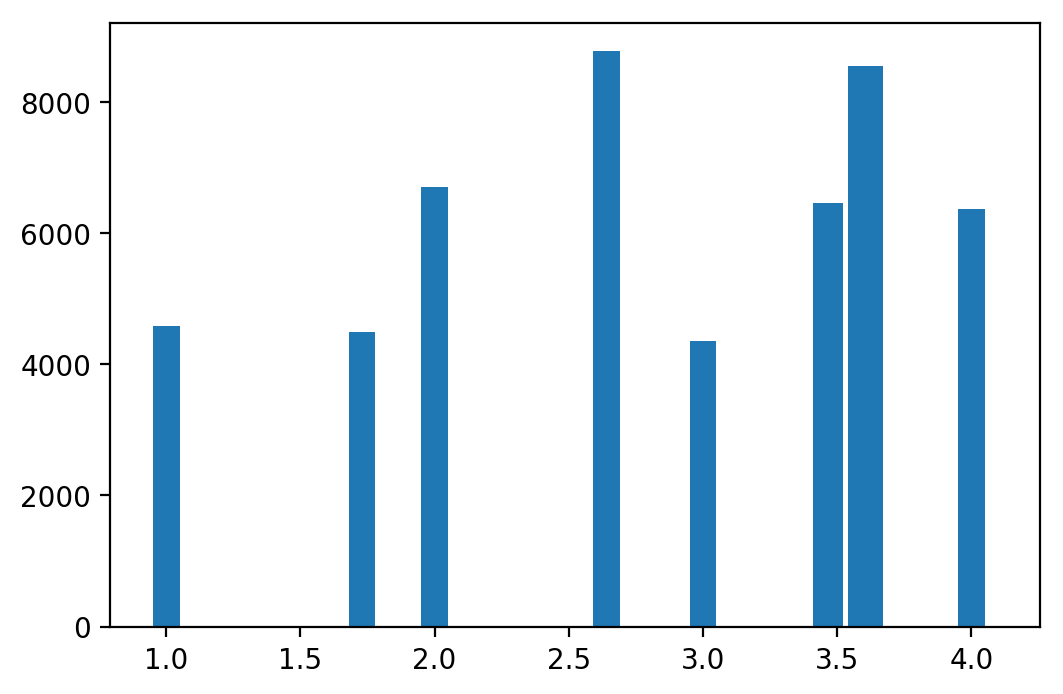

/usr/lib64/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


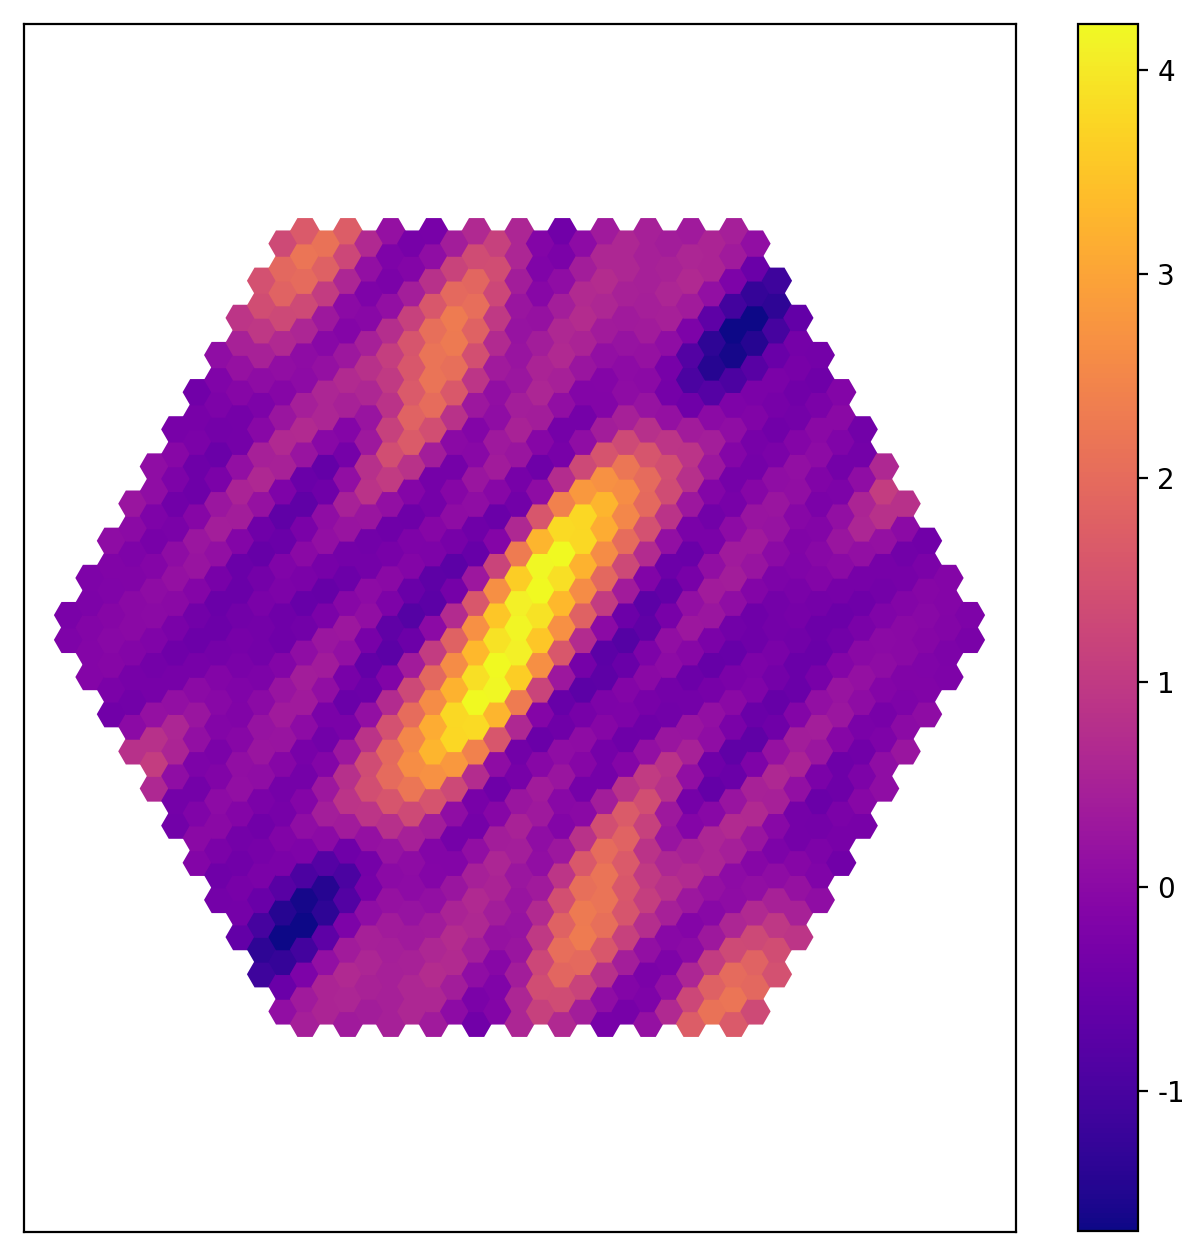

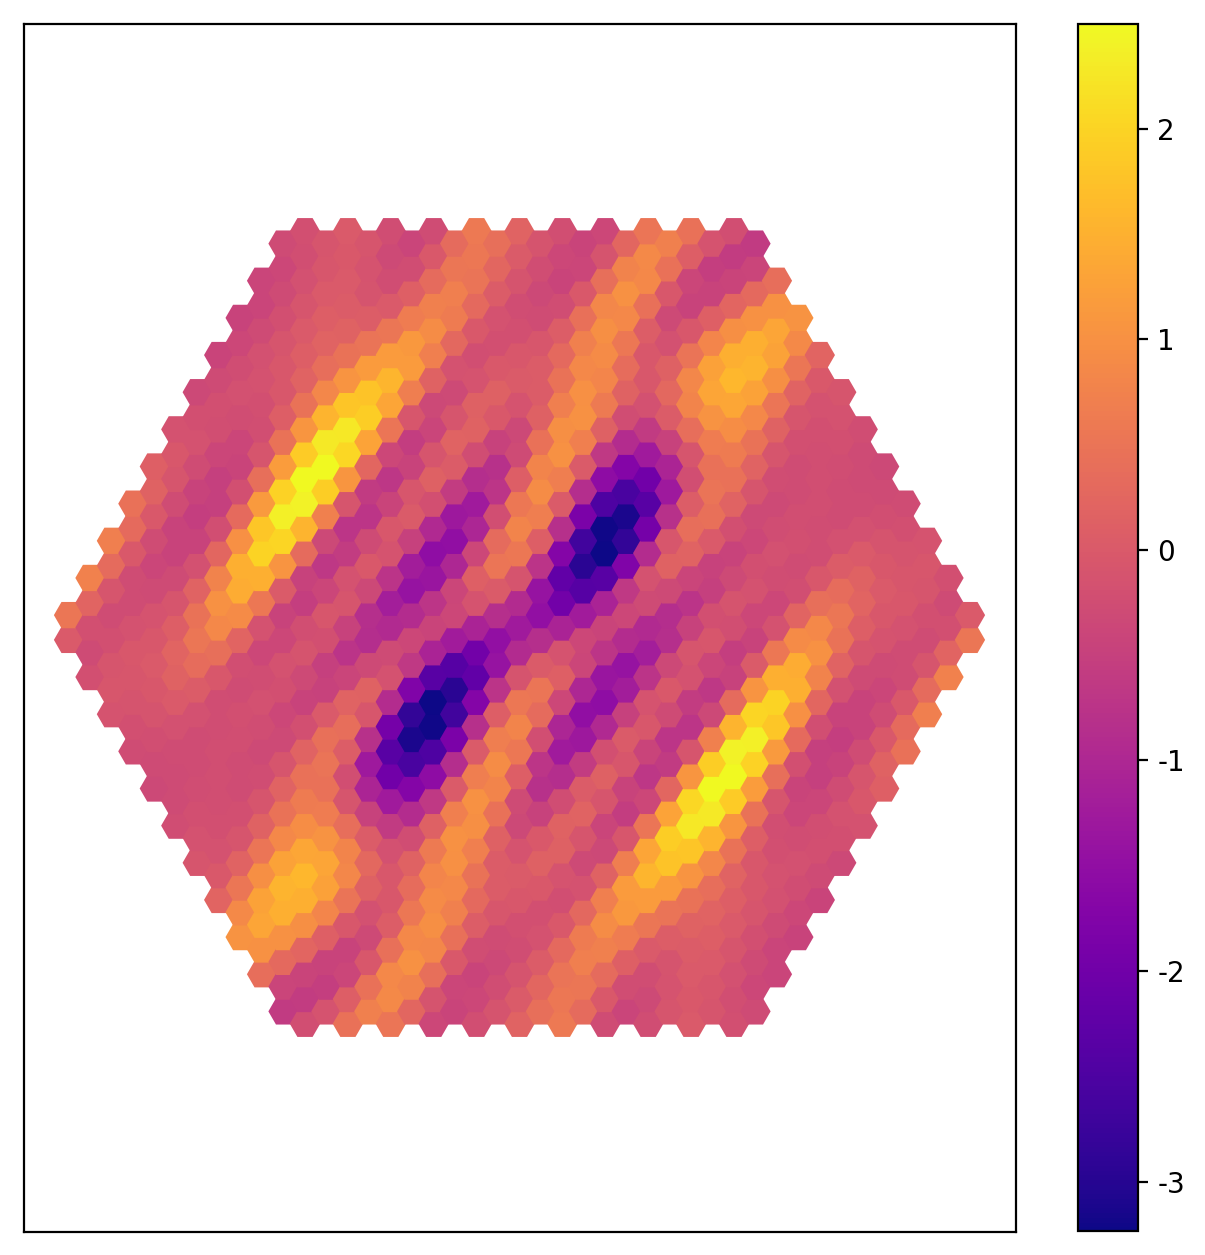

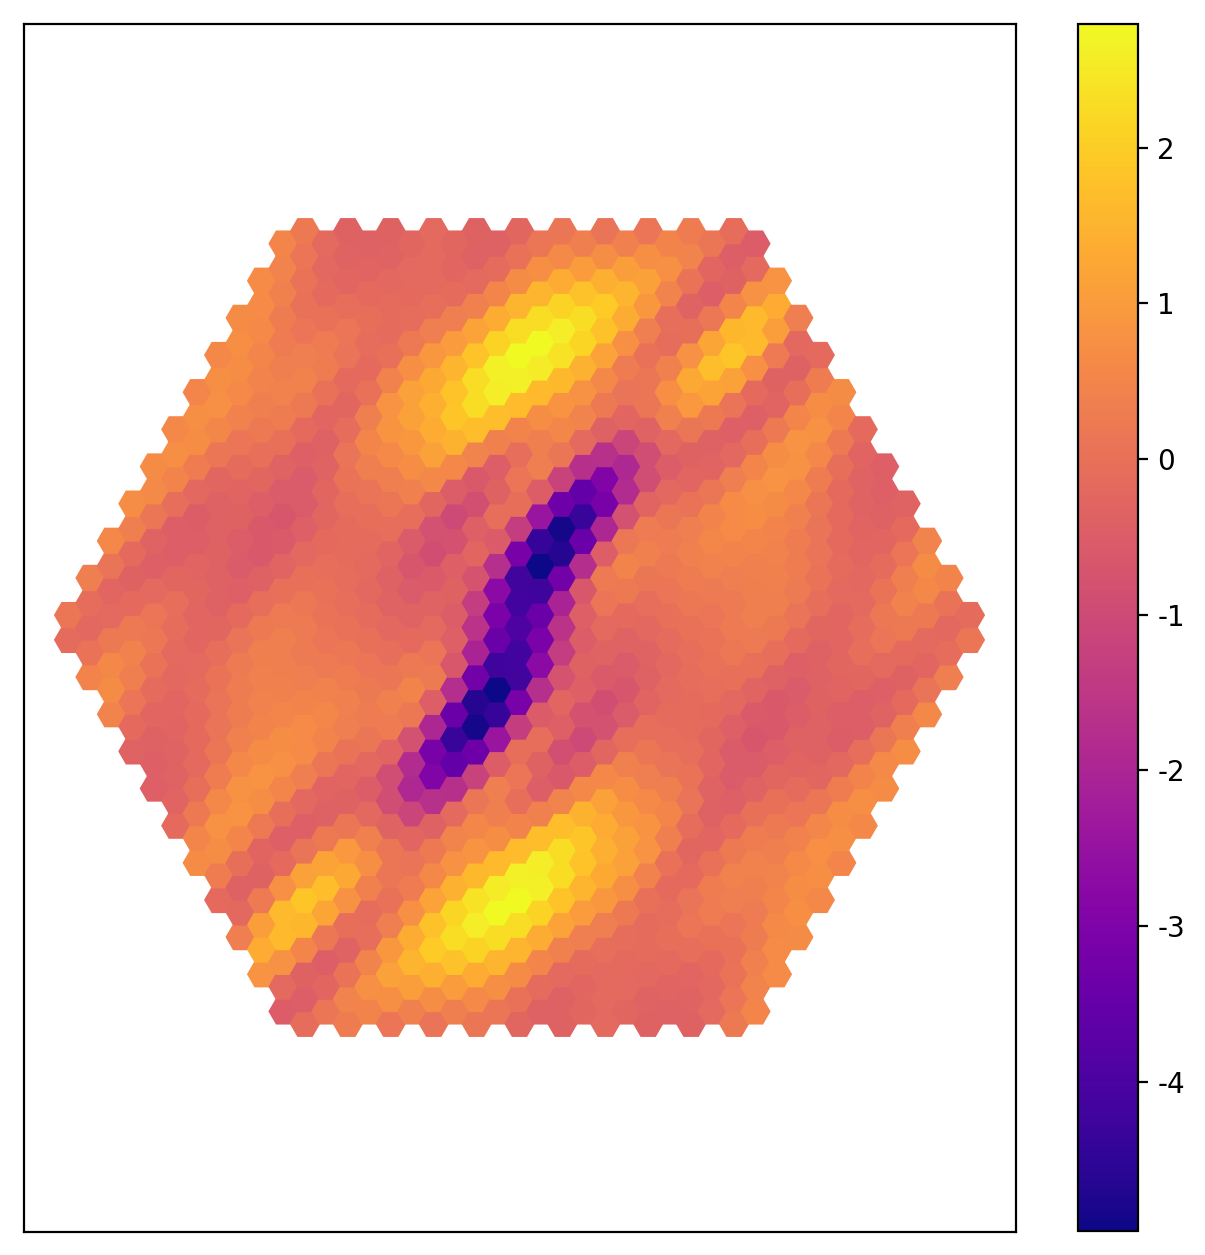

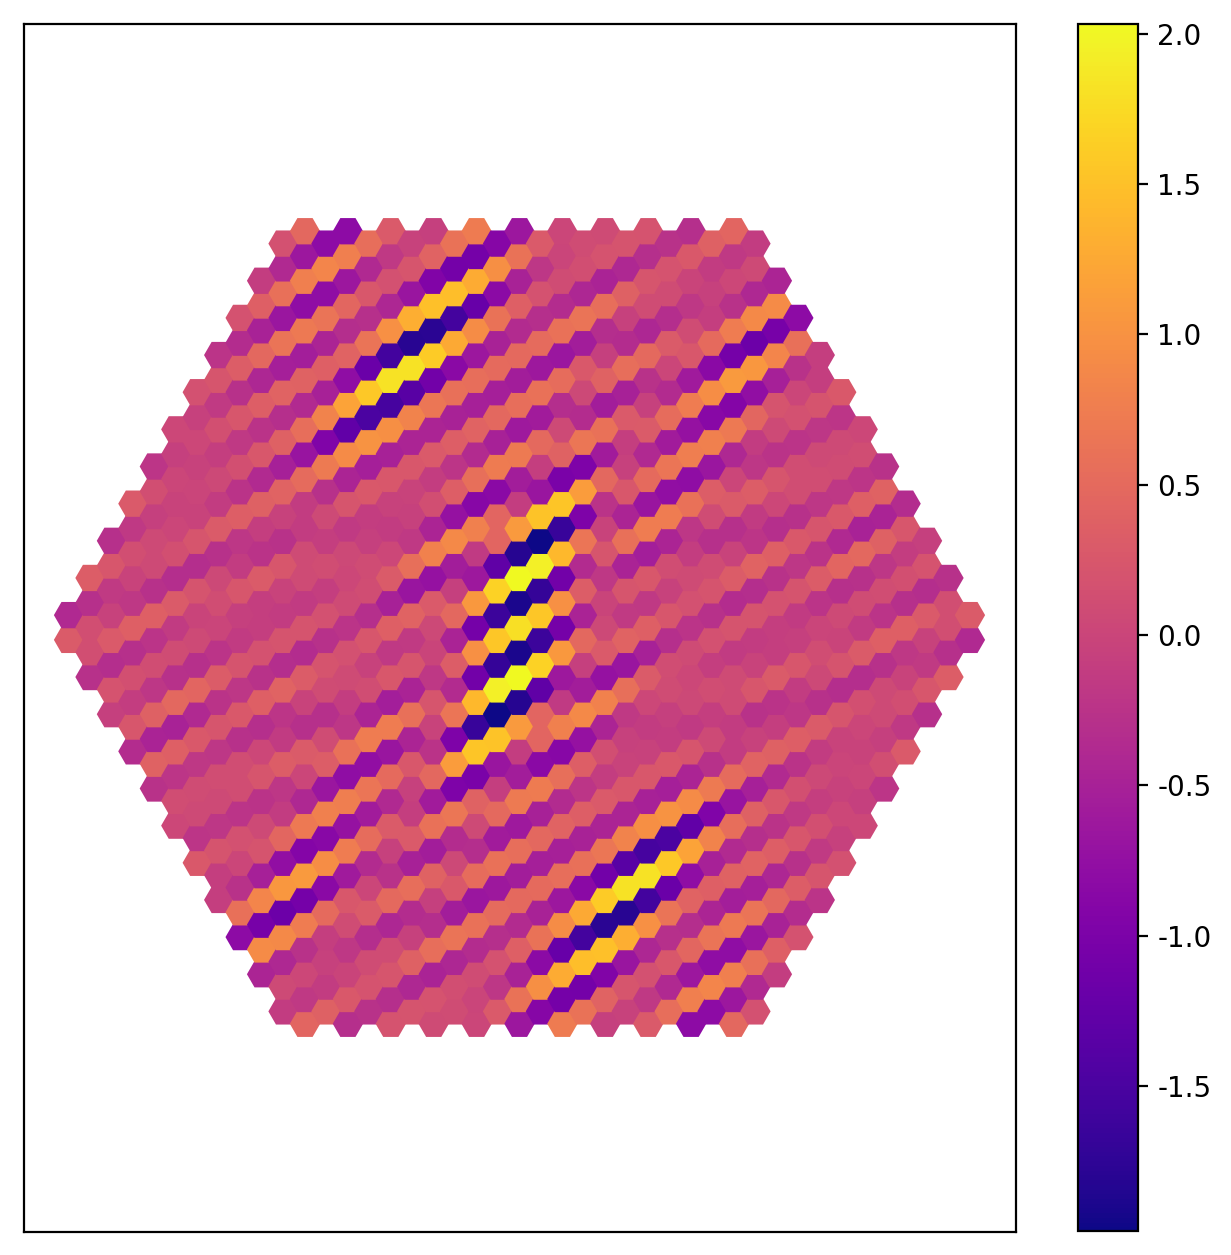

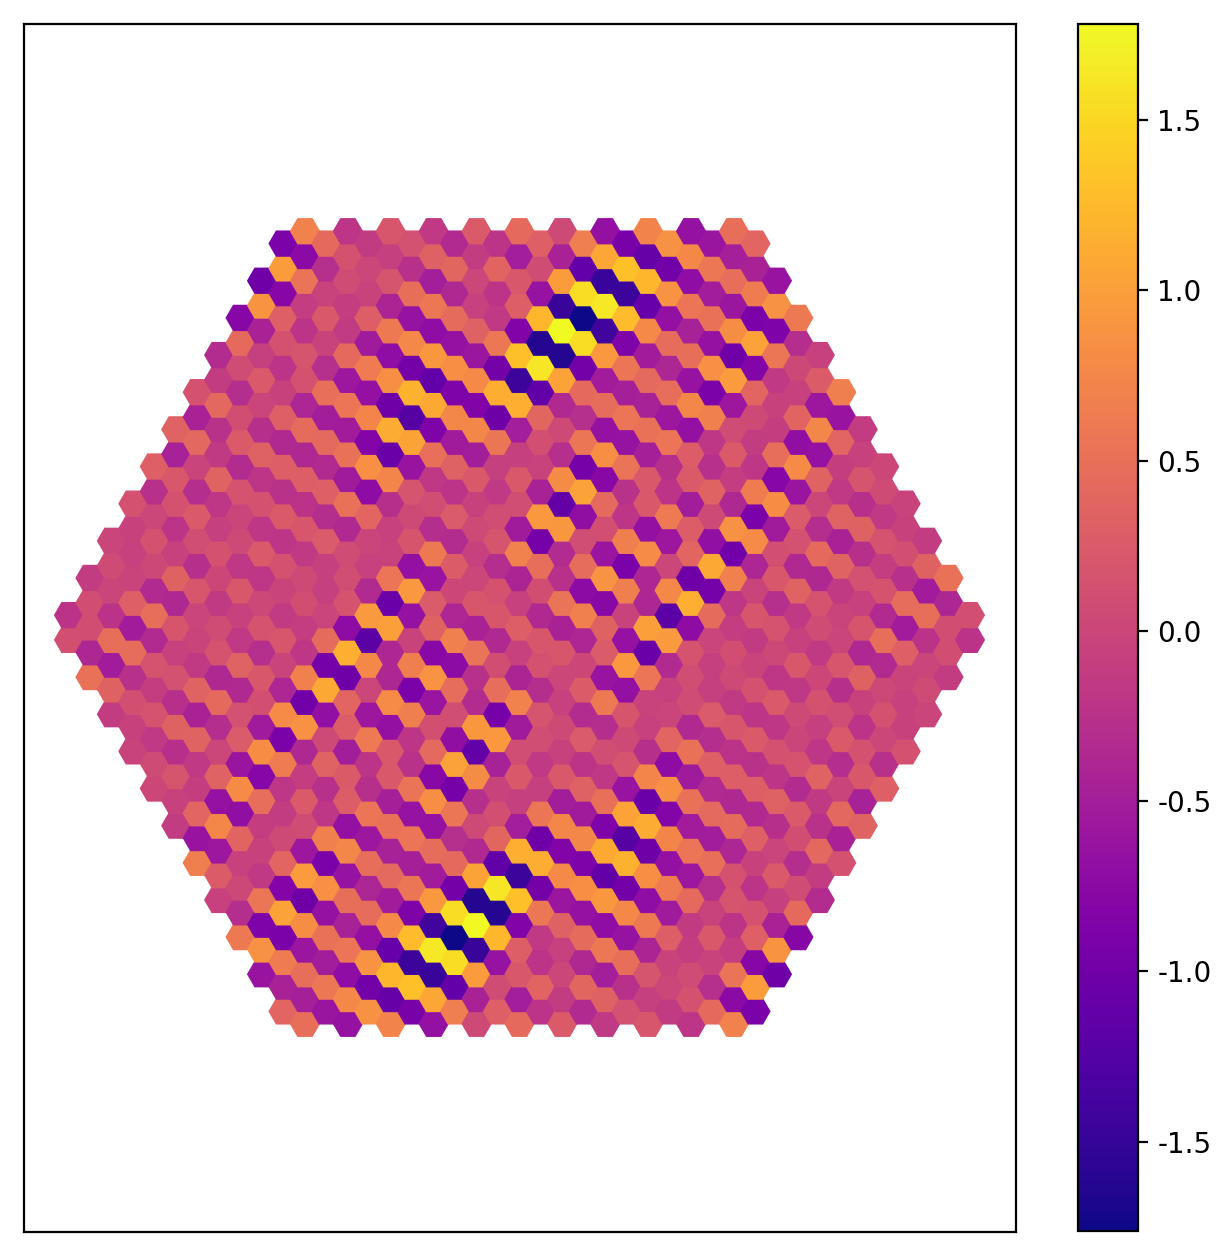

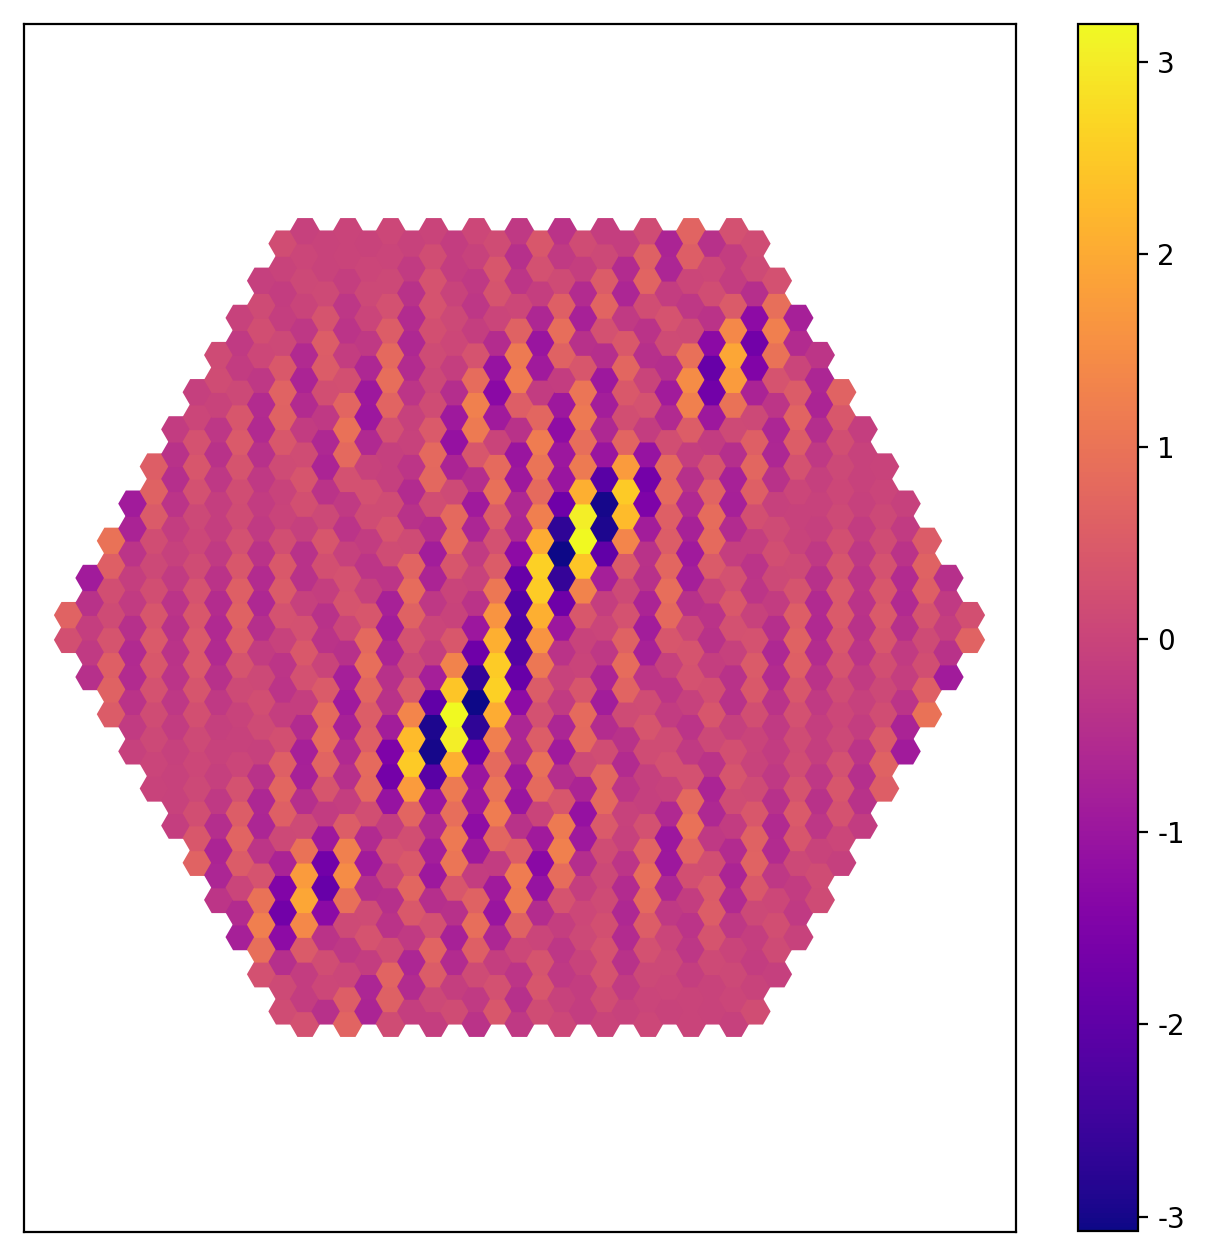

In [6]:
n = len(secondfilename)
factors = [178.279, 178, 178,
           177, 178, 178, 178,
           178, 176.5, 178, 176.5,
           179, 178.5, 178.5, 177,
           177, 178, 178.5, 178.5]
# 7 1 BL
factors = [177.4]
refid = [1210,1058,1055,2020]#(2*L-1, 0, 0)
refid = [1210,1058,1055,1300]#(L-1, L-1, 0)
#7 1 BR
#factors = [176.4]
#refid = [1055,1057,1054,2354]#(2*L-1, L-1, 0)
#refid = [1055,1057,1054,1139]#(L-1, L-1, 0)
#7 1 TL
#factors = [176.1]
#factors = [176.8]
#refid = [1054,1056,1053,1156]#(L-1, L-1, 0)
#7 1 TR
factors = [176.7]
refid = [1049,1051,1048,1157]#(L-1, L-1, 0)
nnloclist = [(11,12), (11,12), (11,12), (11,12),
             (11,12), (11,12), (41,42), (41,42),
             (41,42), (41,42), (42,43), (42,43),
             (42,43), (42,43), (41,42), (41,42),
             (42,43), (41,42), (42,43), (42,43)]
distconds = [(0.95, 1.05), (1.68, 1.78), (1.95, 2.05), (2.59, 2.69), (2.95, 3.05),
             (3.41, 3.52), (3.54, 3.67), (3.95, 4.05)]
imgfile = ""

covlist = []
varcovlist = []
dlist = []
vardlist = []


for i in range(len(secondfilename)):
    print("------------------- File number ", i, " ----------------------")
    factor = factors[i]
    configlist, x, y, sconf= af.LoadSpinConfigsLarge(secondfoldername[i], secondfilename[i],
                                                     imgfile, alpha = 1, factor = factor)
    spos = np.column_stack((x,y)).T/factor
    spos = spos.T
    pos_id = {}
    for k in range(len(spos)):
        pos_id[tuple(np.around(spos[k],decimals=1))] = k

    print("--- Positions ---")
    print("Index ", refid[0], " : ", spos[refid[0]])
    print("Index ", refid[1], " : ", spos[refid[1]])
    print("Index ", refid[2], " : ", spos[refid[2]])
    print("Index ", refid[3], " : ", spos[refid[3]])
    print("Difference 3 0 : ", spos[refid[3]] - spos[refid[0]])
    difference = [spos[refid[l]] - spos[refid[0]] for l in range(4)]

    rot,tr,m1m2,ijl = af.DrawClusterOnConfig(secondfoldername[i], L, refid ,spos, LParam = LParam,
                                             factor = factor, domap = domap, alpha = 0.5, color = "green")
    distances_s1s2 = af.KagomeLatticeHistogram(x,y, factor=factor)
    
    if compute:
        spos = np.column_stack((x,y)).T/factor
        spos = np.dot(rot, spos)
        spos[0,:] += tr[0]
        spos[1,:] += tr[1]
        spos = spos.T

        %lprun -f af.StrctFact [StrctFact, m] = af.StrctFact(ijl, m1m2, sconf,L, factor = factor)
        size = (175/L)**2
        fig, ax = plt.subplots(figsize = (8,8),dpi=200)
        kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,0]), L, 2, s = size)
        fig, ax = plt.subplots(figsize = (8,8),dpi=200)
        kdraw.plot_function_reciprocal(np.real(StrctFact[:,1,1]), L, 2, s = size)
        fig, ax = plt.subplots(figsize = (8,8),dpi=200)
        kdraw.plot_function_reciprocal(np.real(StrctFact[:,2,2]), L, 2, s = size)
        fig, ax = plt.subplots(figsize = (8,8),dpi=200)
        kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,1]+StrctFact[:,1,0])/2, L, 2, s = size)
        fig, ax = plt.subplots(figsize = (8,8),dpi=200)
        kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,2]+StrctFact[:,2,0])/2, L, 2, s = size)
        fig, ax = plt.subplots(figsize = (8,8),dpi=200)
        kdraw.plot_function_reciprocal(np.real(StrctFact[:,1,2]+StrctFact[:,2,1])/2, L, 2, s = size)

In [ ]:
print([key for key in pos_id.keys() if key[0]> 26 and key[0] < 31 and key[1]> 40 and key[1] < 42])
pos_id[(27.8,41.7)]

In [ ]:
NL = 10
%lprun -f af.StrctFact [StrctFact, m] = af.StrctFact(ijl, m1m2, sconf,NL, factor = factor)        

In [ ]:
size = (172/NL)**2
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,0]), NL, 2, s = size)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,1,1]), NL, 2, s = size)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,2,2]), NL, 2, s = size)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,1]+StrctFact[:,1,0])/2, NL, 2, s = size)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,2]+StrctFact[:,2,0])/2, NL, 2, s = size)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,1,2]+StrctFact[:,2,1])/2, NL, 2, s = size)

In [ ]:
#print(difference)
#vec0 = spos[refid[0]]+np.array([6.95, 0.08])
#vec1 = vec0+difference[1]
#vec2 = vec0+difference[2]
#vec3 = vec0+difference[3]
#print(pos_id[tuple(np.around(vec0,decimals=1))])
#print(pos_id[tuple(np.around(vec1,decimals=1))])
#print(pos_id[tuple(np.around(vec2,decimals=1))])
#print(pos_id[tuple(np.around(vec3,decimals=1))])

In [ ]:
print(spos[898])
print(spos[746])
print(spos[743])


In [ ]:
n = len(secondfilename)

factors = [177, 178]
nnloclist = [(11,12), (11,12)]

#factors = [178.34, 178.29, 178]
#nnloclist = [(11,12), (10,11), (11,12)]

#factors = [179, 179]
#nnloclist = [(10,11), (10,11)]
#
#factors = [179, 179, 180]
#nnloclist = [(10,11), (10,11), (11,12)]
#

#factors = [180, 177, 179]
#nnloclist = [(11,12), (11,12), (11,12)]

factors = [178.27, 178, 177, 178,
           177, 178, 178, 178,
           178, 176.5, 178, 176.5,
           179, 178.5, 178.5, 177,
           177, 178, 178.5, 178.5]
nnloclist = [(11,12), (11,12), (11,12), (11,12),
             (11,12), (11,12), (41,42), (41,42),
             (41,42), (41,42), (42,43), (42,43),
             (42,43), (42,43), (41,42), (41,42),
             (42,43), (41,42), (42,43), (42,43)]
#factors=[178, 176.5,
#           179, 178.5, 178.5, 177,
#           177, 178, 178.5, 178.5]
#nnloclist = [(42,43), (42,43),
#             (42,43), (42,43), (41,42), (41,42),
#             (42,43), (41,42), (42,43), (42,43)]
#
distconds = [(0.95, 1.05), (1.68, 1.78), (1.95, 2.05), (2.59, 2.69), (2.95, 3.05), (3.41, 3.52), (3.54, 3.67), (3.95, 4.05)]
imgfile = ""

covlist = []
varcovlist = []
dlist = []
vardlist = []


for i in range(len(secondfilename)):
    print("------------------- File number ", i, " ----------------------")
    factor = factors[i]
    configlist, x, y, sconf= af.LoadSpinConfigsLarge(secondfoldername[i], secondfilename[i], imgfile, alpha = 1, factor = factor)

    plt.plot(x[nnloclist[i][0]]/factor, y[nnloclist[i][0]]/factor,'.', color = "red")
    plt.plot(x[nnloclist[i][1]]/factor, y[nnloclist[i][1]]/factor,'.', color = "blue")
    print(x[nnloclist[i][0]]," ", y[nnloclist[i][0]], " ", x[nnloclist[i][1]], " ", y[nnloclist[i][1]])
    print(np.sqrt((x[nnloclist[i][0]]-x[nnloclist[i][1]])**2 + (y[nnloclist[i][0]]-y[nnloclist[i][1]])**2))
    m = sum(sconf)/len(sconf)
    print("magnetisation: ", m)
    
    distances_s1s2 = af.KagomeLatticeHistogram(x,y, factor=factor)
    plt.savefig(secondfoldername[i] + 'Histogram' + secondfilename[i]+'.png')
    plt.show()
    NNList = af.KagomeLatticeNeighboursLists(distances_s1s2, distconds)
    cconf, xc,yc, tlist = af.KagomeLatticeCharges(NNList,sconf,x,y)
    charges = [np.count_nonzero(cconf == 3), np.count_nonzero(cconf == 1),
           np.count_nonzero(cconf == -1), np.count_nonzero(cconf == -3)]
    print(charges)
    np.savetxt(secondfoldername[i] + 'charges' + secondfilename[i],
           np.array(charges), newline=",")
    
    fig, ax = plt.subplots(figsize = (8,8),dpi=200)
    af.plotSpinSites(secondfoldername, imgfile, x, y, 
                 [i for i in range(len(x)) if sconf[i] == 1],
                 putimage = False, color = 'blue', alpha = 1,
                 linestyle = 'none')
    af.plotSpinSites(secondfoldername, imgfile, x, y, 
                     [i for i in range(len(x)) if sconf[i] == -1],
                     putimage = False, color = 'red', alpha = 1,
                     linestyle = 'none')
    af.plotSpinSites(secondfoldername, imgfile, xc, yc, 
                     [i for i in range(len(xc)) if abs(cconf[i]) == 3], 
                     putimage = False, color = 'yellow', alpha = 1,
                     linestyle = 'none')
    af.plotSpinSites(secondfoldername, imgfile, xc, yc, 
                     [i for i in range(len(xc)) if abs(cconf[i]) == 1], 
                     putimage = False, color = 'green', alpha = 1,
                     linestyle = 'none')
    plt.savefig(secondfoldername[i] + 'State_' + secondfilename[i]+'.png')
    plt.show()

    cov = []
    varcov = []
    d = []
    vard = []

    for j in range(9):
        print(j)
        cov0, varcov0, d0, vard0= af.ComputeNthCorrList(NNList[j], sconf, x, y, factor)
        cov.append(cov0)
        varcov.append(varcov0)
        d.append(d0)
        vard.append(vard0)
      
    covlist.append(cov)
    varcovlist.append(varcov)
    dlist.append(d)
    vardlist.append(vard)
    
    
        
    del configlist
    del x
    del y
    del sconf
    del distances_s1s2
    del NNList
    del cconf
    del xc
    del yc
    del charges
    del cov
    del varcov
    del d
    del vard


In [ ]:
d = np.array(dlist).sum(0)/n
vard = np.array(vardlist).sum(0)/n

cov = np.array(covlist).sum(0)/n
varcov = np.array([(covlist[i] - cov)**2 for i in range(n)]).sum(0)/n

varcov2 = np.array(varcovlist).sum(0)/n

In [ ]:
print(cov)

In [ ]:
print(np.sqrt(np.array(varcov)))
print(np.sqrt(np.array(varcov2)))

In [ ]:
fig, ax = plt.subplots(dpi=200)
plt.errorbar(d, np.array(cov),xerr = np.sqrt(np.array(vard)),yerr=np.sqrt(np.array(varcov)),  fmt= '.')
plt.xlabel('Distance')
plt.ylabel('Accumulated correlations')
plt.ylim(-0.27,0.12)
plt.savefig(secondfoldername[i] + 'FirstResult_' + secondfilename[i]+'.png')
plt.show()

In [ ]:
ListNei = ['1', '2', '3par', '3star', '4', '5', '6', '6bis', '7', '8', '8bis','9']
for i in range(n):
    fig, ax = plt.subplots(figsize = (8,8), dpi=200)

    for index, covi in enumerate(covlist[i][0:8]):
        #print(index)
        plt.errorbar(1, covi,yerr=np.sqrt(np.array(varcovlist[i])[index]), label='Neighbour {0}'.format(ListNei[index]),  fmt= 'x', )

    plt.xlabel('')
    plt.ylabel('Accumulated correlations')
    plt.ylim(-0.27, 0.12)
    plt.legend(loc='best')
    plt.savefig(secondfoldername[i]+'FirstFewCorrelations'+secondfilename[i]+'.png')

fig, ax = plt.subplots(figsize = (8,8),dpi=200)
x = [1 for y in cov];

for index, covi in enumerate(cov[0:8]):
    print(index)
    plt.errorbar(1, covi,yerr=np.sqrt(np.array(varcov2)[index]), label='Neighbour {0}'.format(ListNei[index]),  fmt= 'x', )
plt.xlabel('')
plt.ylabel('Accumulated correlations (20 samples average)')
plt.ylim(-0.27, 0.12)
plt.legend()
plt.savefig(secondfoldername[0]+'AvgFirstFewCorrelations'+secondfilename[0]+'.png')    

In [ ]:
for i in range(len(secondfilename)):
    print("------------------- File number ", i, " ----------------------")
    factor = factors[i]
    configlist, x, y, sconf= af.LoadSpinConfigsLarge(secondfoldername[i], secondfilename[i], imgfile, alpha = 1, factor = factor)

    print(len(x))
        
    del configlist
    del x
    del y
    del sconf


In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag3_5-BL_spin_config.txt'
#imgfile = ""
#factor = 178.34
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag3_5-BR_spin_config.txt'
#imgfile = ""
#factor = 178.29
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag3_5-TL_spin_config.txt'
#imgfile = ""
#factor = 178
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag4_5-BL_spin_config.txt'
#imgfile = ""
#factor = 179
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag4_5-TL_spin_config.txt'
#imgfile = ""
#factor = 179.11
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag5_5-BL_spin_config.txt'
#imgfile = ""
#factor = 179.11
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag5_5-BR_spin_config.txt'
#imgfile = ""
#factor = 179.11
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag5_5-TL_spin_config.txt'
#imgfile = ""
#factor = 180
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag6_5-BL_spin_config.txt'
#imgfile = ""
#factor = 180
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag6_5-BR_spin_config.txt'
#imgfile = ""
#factor = 177
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag6_5-TL_spin_config.txt'
#imgfile = ""
#factor = 179
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-BL_spin_config.txt'
#imgfile = ""
#factor = 178.9
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-BR_spin_config.txt'
#imgfile = ""
#factor = 176.8
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-TL_spin_config.txt'
#imgfile = ""
#factor = 177.1
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_4-TR_spin_config.txt'
#imgfile = ""
#factor = 176.1
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_5-BL_spin_config.txt'
#imgfile = ""
#factor = 178.79
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[10]/factor, y[10]/factor,'.', color = "red")
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "blue")
#print(x[10]," ", y[10], " ", x[11], " ", y[11])
#print(np.sqrt((x[11]-x[10])**2 + (y[11]-y[10])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_5-BR_spin_config.txt'
#imgfile = ""
#factor = 178.5
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#secondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#secondfilename = '54-1_Demag7_5-TL_spin_config.txt'
#imgfile = ""
#factor = 177.5
#configlist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#plt.plot(x[11]/factor, y[11]/factor,'.', color = "red")
#plt.plot(x[12]/factor, y[12]/factor,'.', color = "blue")
#print(x[11]," ", y[11], " ", x[12], " ", y[12])
#print(np.sqrt((x[11]-x[12])**2 + (y[11]-y[12])**2))
#m = sum(sconf)/len(sconf)
#print(m)

In [ ]:
#ssecondfoldername = '../Analysis_PSI/Kagome_54-1_Demag_all/'
#ssecondfilename = '54-1_Demag7_5-TR_spin_config.txt'
#iimgfile = ""
#ffactor = 178.7
#cconfiglist, x, y, sconf = af.LoadSpinConfigsLarge(secondfoldername, secondfilename, imgfile, alpha = 1, factor = factor)
#pplt.plot(x[43]/factor, y[43]/factor,'.', color = "red")
#pplt.plot(x[42]/factor, y[42]/factor,'.', color = "blue")
#pprint(x[43]," ", y[10], " ", x[11], " ", y[11])
#pprint(np.sqrt((x[43]-x[42])**2 + (y[43]-y[42])**2))
#mm = sum(sconf)/len(sconf)
#pprint(m)